<a href="https://colab.research.google.com/github/sidhu2690/422/blob/main/Lab_2%263.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [234]:
import numpy as np

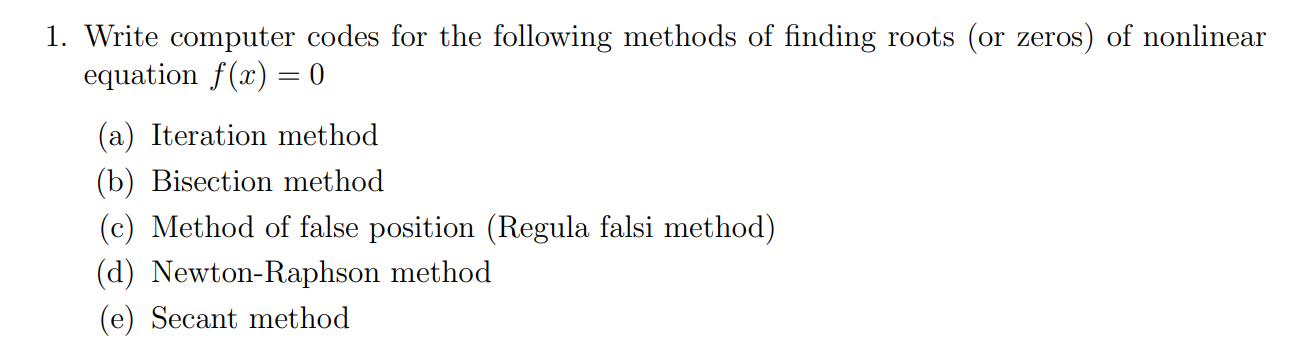

# Iteration Method


$$
x_{n+1} = f(x_n)
$$



In [195]:
def fixed_point_iteration(f, x_init, epsilon = 1e-6, n_iter = 100):
  x = x_init
  for iter in range(n_iter):
    x_updated = f(x)

    error = abs(x_updated - x)
    x = x_updated

    if error < epsilon:
      print(f"Converged after {iter + 1} iterations")
      return x_updated

  print("Did not converge within the maximum number of iterations.")
  return None


In [196]:
def f(x):
  return np.cos(x)

In [197]:
fixed_point_iteration(f, 1).item()

Converged after 34 iterations


0.7390855263619245

# Bisection Method

### 🔹 Bisection Method Steps

Choose \( a \) and \( b \) such that  

$$
f(a) \cdot f(b) < 0
$$  

(the function crosses zero between \( a \) and \( b \)).


Compute midpoint:

$$
c = \frac{a + b}{2}
$$


Evaluate \( f(c) \):

- If  
  $$
  f(a) \cdot f(c) < 0
  $$
  then the root is between \( a \) and \( c \)  
  → set \( b = c \)

- Else, the root is between \( c \) and \( b \)  
  → set \( a = c \)


Repeat until the interval  

$$
|b - a|
$$  

is very small (below the tolerance).


In [198]:
def bisection_method(f, a, b, epsilon = 1e-6):
  if f(a)*f(b) >= 0:
    print(f"You have chosen the wrong interval.")
    return None

  while abs(b-a) > epsilon:
    c = (a + b) / 2

    if f(a) * f(c) <= 0:
      b = c
    else:
      a = c

  print(f"approximate value is: {(a + b) / 2 :.6f}")
  return (a + b) / 2


In [199]:
def f(x):
    return x**3 - x - 2

root = bisection_method(f, 1, 2)

approximate value is: 1.521380


# Method of False Position

Given \( a \) and \( b \) such that  

$$
f(a) \cdot f(b) < 0
$$  

the next approximation \( c \) is:

$$
c = b - \frac{f(b) \cdot (b - a)}{f(b) - f(a)}
$$

Then update the interval as in the bisection method:

- If  
  $$
  f(a) \cdot f(c) < 0
  $$
  then  
  $$
  b = c
  $$

- Else  
  $$
  a = c
  $$

Repeat until  

$$
|f(c)| < \text{tolerance}
$$


In [200]:
def regula_falsi(f, a, b, epsilon = 1e-6):
  if f(a) * f(b) >= 0:
    print(f"You have chosen the wrong interval.")
    return None

  c = b - (f(b) * (b - a)) / (f(b) - f(a))

  while abs(f(c)) > epsilon:
    if f(a) * f(c) < 0:
      b = c
    else:
      a = c

    c = b - (f(b) * (b - a)) / (f(b) - f(a))

  print(f"Approximate value is: {c:.6f}")
  return c

In [201]:
def f(x):
    return x**3 - x - 2

regula_falsi(f, 1, 2)

Approximate value is: 1.521380


1.5213796360454928

# Newton Raphson Method

Given an initial guess $( x_0 )$, the next approximation $( x_{n+1} )$ is:

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

Then update the current estimate:

$$
x_n \gets x_{n+1}
$$

Repeat until the stopping criterion is satisfied:

$$
|x_{n+1} - x_n| < \text{tolerance} \quad \text{or} \quad |f(x_{n+1})| < \text{tolerance}
$$


In [202]:
def newton_raphson(f, df, x0, epsilon = 1e-6):
  x = x0
  x_updated = x - f(x) / df(x)

  while abs(x_updated - x) > epsilon or abs(f(x_updated)) > epsilon:
    x = x_updated
    x_updated = x - f(x) / df(x)

  print(f"Approximate value is: {x_updated:.6f}")
  return x_updated


In [203]:
def f(x):
  return x**3 - x - 2

def df(x):
  return 3*x**2 - 1

newton_raphson(f, df, 1)

Approximate value is: 1.521380


1.5213797068045676

# Secant Method

**Choose initial guesses** $( x_0 )$ and $( x_1 )$

**Compute next approximation**:

$$
x_{n+1} = x_n - f(x_n) \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}
$$

3. **Update the previous two points**:

$$
x_{n-1} \gets x_n, \quad x_n \gets x_{n+1}
$$

4. **Repeat until the stopping criterion is satisfied**:

$$
|x_{n+1} - x_n| < \text{tolerance} \quad \text{or} \quad |f(x_{n+1})| < \text{tolerance}
$$


In [204]:
def secant_method(f, x0, x1, epsilon = 1e-6):

  x_updated = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))

  while abs(x_updated - x1) > epsilon or abs(f(x_updated)) > epsilon:
    x0 = x1
    x1 = x_updated
    x_updated = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))

  print(f"Approximate value is: {x_updated:.6f}")


In [205]:
secant_method(f, 1, 2)

Approximate value is: 1.521380


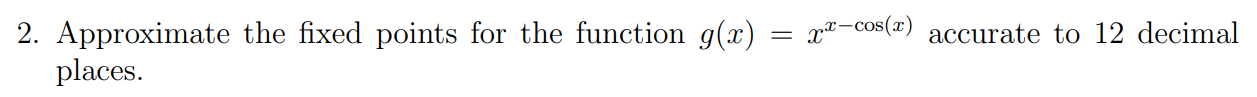

In [206]:
def g(x):
  return x**(x - np.cos(x))

ans = fixed_point_iteration(g, 0.9)
np.round(ans, 12).item()

Converged after 15 iterations


0.999999552339

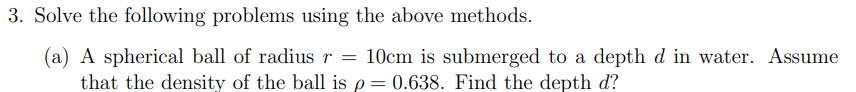

We have the fraction of submerged volume:

$$
\frac{V_\text{submerged}}{V_\text{ball}} = \frac{\pi d^2 (3r - d)/3}{\frac{4}{3}\pi r^3} = \frac{0.638}{1}
$$

Simplifying:

$$
\frac{d^2 (3r - d)}{4 r^3} = 0.638
$$

Multiply both sides by $( 4 r^3 )$:

$$
d^2 (3r - d) = 4 r^3 (0.638)
$$

Substitute $( r = 10 \,\text{cm} )$:

$$
d^2 (30 - d) = 2552
$$

Rewriting as a cubic equation:

$$
d^3 - 30 d^2 + 2552 = 0
$$


In [207]:
def d(x):
  return x**3 - 30*x**2 + 2552

In [208]:
 def g(d):
    return (2552 / (30 - d))**0.5

fixed_point_iteration(g, 20)

Converged after 16 iterations


11.861501797026415

In [209]:
bisection_method(d, 1, 20)

approximate value is: 11.861501


11.861501440405846

In [210]:
regula_falsi(d, 1, 20)

Approximate value is: 11.861502


11.861501508574754

In [211]:
def df(x):
  return 3*x**2 - 60*x

newton_raphson(d, df, 10)

Approximate value is: 11.861502


11.861501508120416

In [212]:
secant_method(d, 5, 10)

Approximate value is: 11.861502


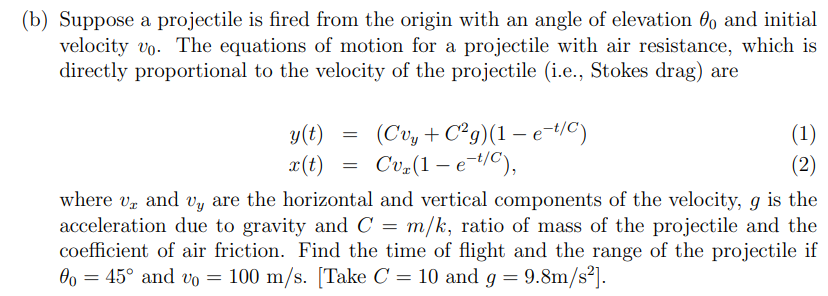

In [213]:
def y(t):
  return 1480*(1-np.exp(-t/10)) - 98*t

In [217]:
regula_falsi(y, 5, 10)

Approximate value is: 8.900792


8.900792081176306

In [218]:
bisection_method(y, 1, 20)

approximate value is: 8.900792


8.900792106986046

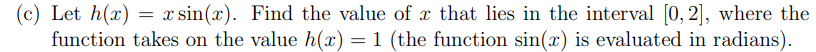

In [219]:
def h(x):
  return x*np.sin(x)-1

bisection_method(h, 0, 2)

approximate value is: 1.114157


1.1141571998596191

In [221]:
regula_falsi(h, 0, 2)

Approximate value is: 1.114157


1.1141571430336825

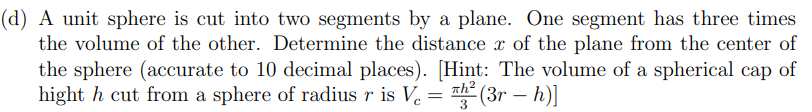

In [222]:
def equation(x):
    return np.pi * (r + x)**2 / 3 * (3 * r - (r + x)) - 3 * np.pi * (r - x)**2 / 3 * (3 * r - (r - x))

r = 1

In [223]:
bisection_method(equation, 0, 1)

approximate value is: 0.347296


0.34729623794555664

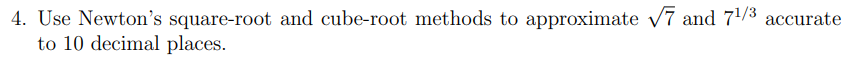

In [227]:
def f(x):
  return x**2 - 7

def df(x):
  return 2*x

ans = newton_raphson(f, df, 10)
round(ans, 10)

Approximate value is: 2.645751


2.6457513111

In [228]:
def f(x):
  return x**3 - 7

def df(x):
  return 3*x**2

ans = newton_raphson(f, df, 10)
round(ans, 10)

Approximate value is: 1.912931


1.9129311828

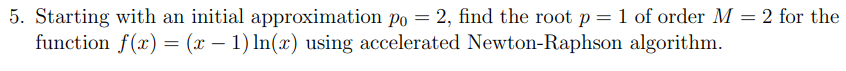

In [233]:
def f(x):
    return (x-1)*(np.log(x))
def df(x):
    return (1 + np.log(x) - 1/x)


def acc_newton_raphson(f, df, x0, m, tol = 1e-6, max_itr = 1000):
    for itr in range(max_itr):
        x1 = x0 - m * (f(x0) / df(x0))

        if abs(x1-x0)<tol:
            print("Approximate root:",  x1)
            return

        x0 = x1
    print("Method did not converge")

acc_newton_raphson(f, df, 2, 2)

Approximate root: 1.0
